In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
url = 'https://drive.google.com/uc?id=1JAbg8D_2Ui4ittfs7O6YgAo-TwfUfmtJ'
baseball = pd.read_csv(url)

In [ ]:
baseball.head()

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
0,ARI,NL,2012,162,81,81,False,NaN,NaN,734,688,0.259,0.328,0.418,0.746,0.317,0.415
1,ATL,NL,2012,162,94,68,True,4.0,5.0,700,600,0.247,0.320,0.389,0.709,0.306,0.378
2,BAL,AL,2012,162,93,69,True,5.0,4.0,712,705,0.247,0.311,0.417,0.728,0.315,0.403
3,BOS,AL,2012,162,69,93,False,NaN,NaN,734,806,0.260,0.315,0.415,0.730,0.331,0.428
4,CHC,NL,2012,162,61,101,False,NaN,NaN,613,759,0.240,0.302,0.378,0.680,0.335,0.424


# Consolidation of franchises that relocated in the period spanned by the dataset

In [ ]:
baseball.Team.value_counts()

CHC    47
BOS    47
LAD    47
CHW    47
HOU    47
BAL    47
STL    47
NYM    47
PHI    47
DET    47
PIT    47
CIN    47
NYY    47
SFG    47
CLE    47
MIN    47
ATL    43
OAK    41
SDP    40
KCR    40
MIL    39
TEX    37
TOR    33
SEA    33
MON    32
CAL    28
COL    18
FLA    17
ARI    15
LAA    11
WSA    10
TBD    10
ANA     8
WSN     8
KCA     6
TBR     5
MLN     4
MIA     1
SEP     1
Name: Team, dtype: int64

There are several teams in this dataset which have moved or changed their names in the period spanned by the dataset. It might be prudent to combine these names into one, expecially for question 3, concerned with individual franchises success analysis. Moreover, since none of the analyses concern by-region or by-city analysis, this streamlining should not affect anything negatively.  As such: 

- The Florida Marlins (FLA) and the Miami Marlins (MIA) -> MIA
- California (CAL), Anaheim (ANA), and Los Angeles (LAA) Angels -> LAA
- Kansas City (KCA) and Oakland (OAK) Athletics -> OAK
- Washington Senators (WSA) and Texas Rangers (TEX) -> TEX
- Seattle Pilots (SEP) and Milwaukee Brewers (MIL) -> MIL
- Milwaukee Braves (MLN) and Atlanta Braves (ATL) -> ATL
- Montreal Expos (MON) and Washington Nationals (WSN) -> WSN
- Tampa Bay Devil Rays (TBD) and Tampa Bay Rays (TBR) -> TBR

In [ ]:
baseball.replace({'FLA':'MIA', 'CAL':'LAA', 'ANA':'LAA', 'KCA':'OAK', 'WSA':'TEX', 'SEP':'MIL', 'MLN':'ATL', 'MON':'WSN', 'TBD':'TBR'}, inplace=True)

With these changes, we have all thirty current MLB franchises with full continuity. While treating the different locations of each franchise that relocated separately might be beneficial in some instances (e.g., when assessing what prompted them to relocate), none of the questions in this analysis should be affected by change in location. Moreover, this analysis will benefit from more consolidated team data - especially when considering overall franchise success.

In [ ]:
baseball.Team.value_counts()

TEX    47
BOS    47
CHW    47
CIN    47
NYY    47
CHC    47
SFG    47
STL    47
PHI    47
LAD    47
ATL    47
CLE    47
OAK    47
PIT    47
HOU    47
BAL    47
DET    47
NYM    47
LAA    47
MIN    47
MIL    40
SDP    40
KCR    40
WSN    40
TOR    33
SEA    33
COL    18
MIA    18
ARI    15
TBR    15
Name: Team, dtype: int64

# Questions

### 1. Changes in Baseball offense over time. When was baseball the most 'watchable'?

Many people - even avid sports followers - dislike baseball for its slow pace of play. The exciting part of the sport - hits and the ball being put in play, particularly when resulting in home runs - is sandwiched between often minutes of non-action. The current Major League Baseball comissioner, Rob Manfred, has been somewhat famous - or infamous - for trying very hard to improve the league's entertainment value by speeding up the pace of games with new rules that have not always been popular (https://www.si.com/mlb/2021/03/17/baseball-preview-pace-of-play-crisis). Since offense in baseball is to many the only exciting part, the MLB has even been accused of altering the balls such that they fly farther, leading to more runs (https://en.wikipedia.org/wiki/Juiced_ball_theory). The baseball league has also been accused of turning the blind eye the use of steroids by players in the '90s and early 2000s to improve their playing (most often hitting) ability. Does the data in our dataset reveal any insights in these regards? Was any decade between 1962 and 2012 particularly favourable to hitters? Were there any periods where there were, on average, more runs scored than in any other?

#### a) Judging by the simplest stat - the Batting Average

The first step in any related analysis would be to simply plot the leaguewide mean batting average (defined as ${BA = \frac{Hits}{At-Bats}}$) over the span of the dataset (Steroid era marked as indicated in this article https://www.espn.com/mlb/topics/_/page/the-steroids-era#:~:text=Unlike%20other%20MLB%20%22eras%2C%22,leaguewide%20PED%20testing%20until%202003.):

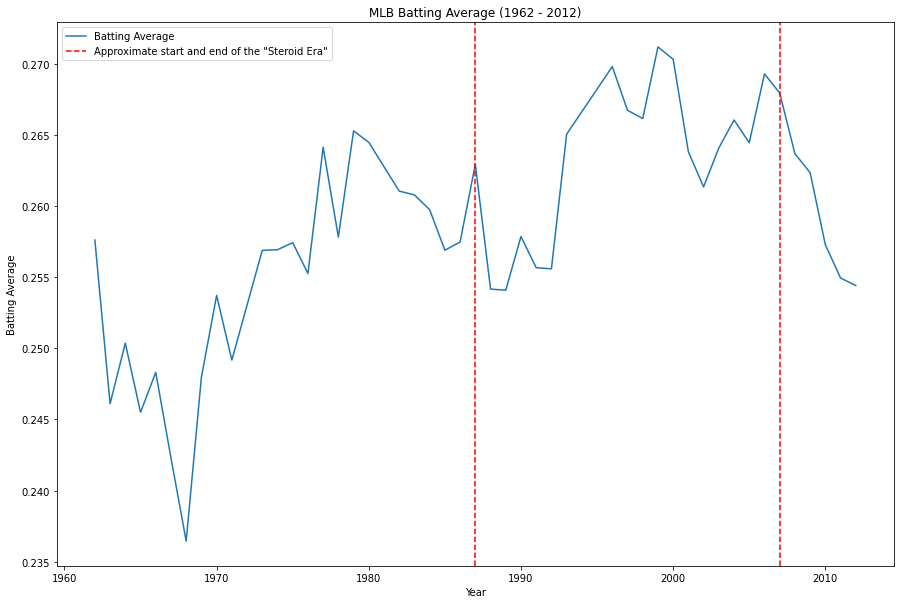

In [ ]:
fig = plt.figure()
plt.plot(baseball.pivot_table('BA', 'Year'), label="Batting Average")
fig.set_size_inches(15, 10)
plt.axvline(x=1987, color="Red", linestyle="--", label="Approximate start and end of the \"Steroid Era\"")
plt.axvline(x=2007, color="Red", linestyle="--")
plt.title("MLB Batting Average (1962 - 2012)")
plt.xlabel("Year")
plt.ylabel("Batting Average")
plt.legend()

The above plot would indicate that indeed, batting averages have gone up over time, and that the '90s and '00s were indeed particularly rife with strong offensive performances. Dividing the dataset into roughly two halves, 1962-1986 and 1986-2012:

In [ ]:
# Batting average until 1987 mean:
display(baseball.query('Year < 1987').BA.mean())
# Runs scored until 1987 mean:
display(baseball.query('Year < 1987').RS.mean())

0.2550239852398524

674.0295202952029

In [ ]:
# Batting average since 1987 mean:
display(baseball.query('Year >= 1987').BA.mean())
# Runs scored since 1987 mean:
display(baseball.query('Year >= 1987').RS.mean())

0.26261014492753626

747.3289855072463

Both stats show a a significant increase over time, confirmed by statistical tests:

In [ ]:
display("Batting average t-Test:", stats.ttest_ind(baseball.query('Year >= 1987').BA, baseball.query('Year < 1987').BA))
display("Runs scored t-Test:", stats.ttest_ind(baseball.query('Year >= 1987').RS, baseball.query('Year < 1987').RS))

'Batting average t-Test:'

Ttest_indResult(statistic=10.701987347526645, pvalue=1.2832121230130443e-25)

'Runs scored t-Test:'

Ttest_indResult(statistic=15.199760665390764, pvalue=6.043852807983686e-48)

The above t-Tests indicate that there has been a significant uptick in Batting average and Runs scored since 1987 versus in the years 1962-1986, despite the relatively strong late '70s and early '80s and the late '00s drop off.

#### b) By Decade

Instead of dividing the set into two halves, it might be more informative to divide the dataset by decade. For that, we can turn the `Year` column into a categorical `Decade` column and examine how the each of the offensive statistics changed from decade to decade:

In [ ]:
baseball['Decade'] = pd.cut(baseball.Year, bins=[1960, 1970, 1980, 1990, 2000, 2012], labels=['60s', '70s', '80s', '90s', '2000s'])

In [ ]:
offense_by_decades = baseball.pivot_table(['RS', 'RA', 'BA', 'OBP', 'SLG', 'OPS'], 'Decade', margins=True)
offense_by_decades

,BA,OBP,OPS,RA,RS,SLG
Decade,,,,,,
60s,0.247723,0.313489,0.685011,650.319149,650.319149,0.371521
70s,0.258741,0.324670,0.704134,679.026786,679.026786,0.379464
80s,0.258321,0.323684,0.712709,698.927350,698.927350,0.389026
90s,0.265323,0.335173,0.748805,768.699115,768.699115,0.413633
2000s,0.262456,0.330242,0.747369,748.177778,748.177778,0.417128
All,0.259273,0.326331,0.723673,715.081981,715.081981,0.397342


(The full offensive statistics by decade: Batting Average, On-Base Percentage (OBP - the frequency of a runner advancing on base, which includes events such as walks and hit-by-pitches which award a free base without a hit), Slugging Percentage (SLG - weighted power of each hit - instead of each hit counting for 1 as in the case of batting average, hits that allow the batter to advance further are weighed more heavily), and On Base Plus SLugging (OPS - sum of On-Base and Slugging percentages). Along with Runs Scored and Runs Against (or given up).)


Based on the above table, it would again appear that the later half of the period spanned by the dataset had the greatest offensive baseball, but it would seem that the peak performances took place in the 1990s, followed closely by the 2000s. The explanation for this could be the aforementioned explosion in steroid use throughout the 90s and early 00s.

#### c) Runs Per Game aggregation

Since we're concerned with "watchability", we can focus directly on what makes baseball games more enjoyable, namely the actual scoring. To do that, we create another variable, Runs-Per-Game (RPG):

In [ ]:
baseball['RPG'] = baseball.RS/baseball.G

A quick glance at the a by-decade aggregation appears to confirm the results from Batting Average aggregation - the 90s and the 00s reign supreme in regard to offensive output.

In [ ]:
baseball.pivot_table('RPG', 'Decade')

,RPG
Decade,
60s,4.011313
70s,4.199921
80s,4.316672
90s,4.746309
2000s,4.619669


We can try to visually compare Runs-Per-Game to other offensive statistics present in our dataset, normalizing to account for the different scales:

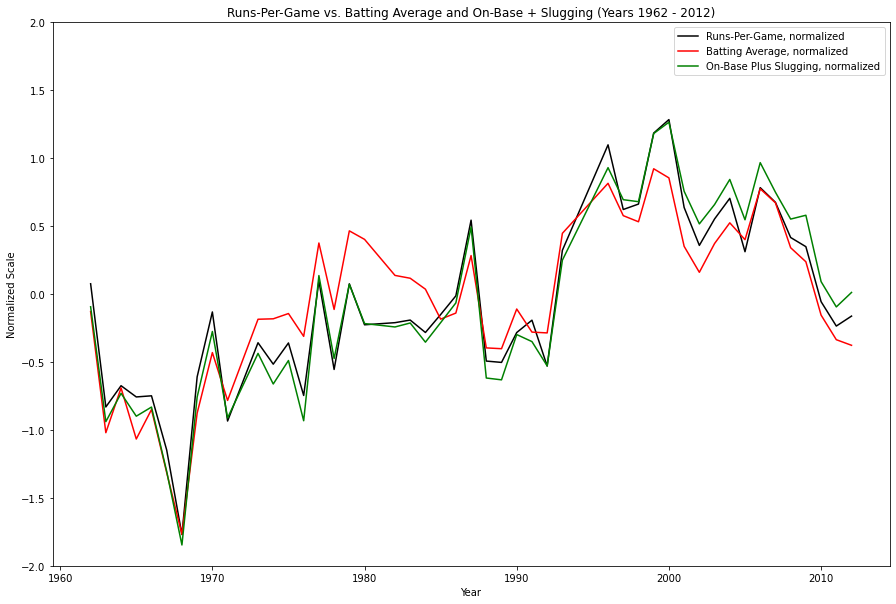

In [ ]:
baseball['RPG_norm'] = (baseball.RPG - baseball.RPG.mean()) / baseball.RPG.std()
baseball['BA_norm'] = (baseball.BA - baseball.BA.mean()) / baseball.BA.std()
baseball['OPS_norm'] = (baseball.OPS - baseball.OPS.mean()) / baseball.OPS.std()
fig = plt.figure()
plt.plot(baseball.pivot_table('RPG_norm', 'Year'), color = 'Black', label = 'Runs-Per-Game, normalized')
plt.plot(baseball.pivot_table('BA_norm', 'Year'), color = 'Red', label = 'Batting Average, normalized')
plt.plot(baseball.pivot_table('OPS_norm', 'Year'), color = 'Green', label = 'On-Base Plus Slugging, normalized')
fig.set_size_inches(15, 10)
plt.title("Runs-Per-Game vs. Batting Average and On-Base + Slugging (Years 1962 - 2012)")
plt.xlabel("Year")
plt.ylabel("Normalized Scale")
plt.ylim(-2, 2)
plt.legend()

When plotting Runs-Per-Game against Batting Average and On-Base + Slugging, we can immediately notice that the RPG plot is nearly identical to the OPS graph for the most part, but deviates quite a lot from the BA plot. This could be part of the explanation for why OPS has taken a more prominent role in player evaluation/roster building analysis: higher Batting Average is not as directly related to run production as is the more informative OPS. (As a side note, it is interesting to see that in the final decade two decades or so, the normalized OPS is higher than Batting Average, despite Batting Average's prominence in the first three or so decades of the graph. Perhaps this is an indicator of the MLB starting to favour more advanced metrics like On-Base Percentage and On-Base Plus Slugging over the relatively rudimentary - albeit traditional - Batting Average which is just the ratio of Hits to At-Bats.)

To more rigorously derive the connection between Runs-Per-Game and the other offensive statistics, we can find the correlation coefficient between RPG and the others:

In [ ]:
for i in ['W', 'RS', 'BA', 'OBP', 'SLG', 'OPS']:
  print(f'{i}: {stats.pearsonr(baseball.RPG, baseball[i])}')

W: (0.5097232068602744, 1.9581542929594747e-82)
RS: (0.9995663403555266, 0.0)
BA: (0.8279096185682084, 3.3979235179145e-311)
OBP: (0.901658983739956, 0.0)
SLG: (0.9193044458179485, 0.0)
OPS: (0.9577305554996531, 0.0)


As expected, a team's Runs-Per-Game ratio is very strongly correlated with all of the offensive statistics and relatively strongly correlated with Win totals - teams that score more runs are also generally more likely to win more games. In this case, On-Base + Slugging appears to be the strongest correlation here possibly, confirming the earlier three-way graph and matching the intuitions that more powerful hits that earn more bases are not as useful when there are no runners on base and that baserunners do not equal runs without hits to bring them in.

To properly test the hypothesis that baseball's watchability has improved over the years (at least as measured by the admittedly subjective metric of Runs Per Game), we can create a t-Statistic matrix (complimented by a matrix with the corresponding p-values):

In [ ]:
stat_matrix = np.zeros((5, 5))
pval_matrix = np.zeros((5, 5))
decades = list(baseball.Decade.unique().sort_values())
for i in range(5):
  for j in range(5):
    stat_matrix[i, j] = stats.ttest_ind(baseball[baseball.Decade == decades[i]].RPG, baseball[baseball.Decade == decades[j]].RPG)[0]
    pval_matrix[i, j] = stats.ttest_ind(baseball[baseball.Decade == decades[i]].RPG, baseball[baseball.Decade == decades[j]].RPG)[1]
statistics = pd.DataFrame(stat_matrix)
pvalues = pd.DataFrame(pval_matrix)
stats.ttest_ind(baseball[baseball.Decade == '60s'].RPG, baseball[baseball.Decade == '70s'].RPG)
stats.ttest_ind(baseball[baseball.Decade == '60s'].RPG, baseball[baseball.Decade == '80s'].RPG)
statistics.index = decades
statistics.columns = decades
pvalues.index = decades
pvalues.columns = decades
display("t-Statistics:", statistics, "p-values:", pvalues)

't-Statistics:'

,60s,70s,80s,90s,2000s
60s,0.000000,-3.786600,-6.590844,-13.243146,-13.498694
70s,3.786600,0.000000,-2.756256,-10.762587,-10.180472
80s,6.590844,2.756256,0.000000,-9.003231,-7.801934
90s,13.243146,10.762587,9.003231,0.000000,2.825487
2000s,13.498694,10.180472,7.801934,-2.825487,0.000000


'p-values:'

,60s,70s,80s,90s,2000s
60s,1.000000e+00,1.755517e-04,1.313830e-10,1.335381e-33,4.879752e-36
70s,1.755517e-04,1.000000e+00,6.081100e-03,3.504123e-24,1.635800e-22
80s,1.313830e-10,6.081100e-03,1.000000e+00,5.903987e-18,2.769808e-14
90s,1.335381e-33,3.504123e-24,5.903987e-18,1.000000e+00,4.882311e-03
2000s,4.879752e-36,1.635800e-22,2.769808e-14,4.882311e-03,1.000000e+00


According to these plots, looking at the lower diagonal matrix which compares the later decades with the earlier decades, we can see a progressive uptick in Runs-Per-Game up until the 2000s, where - presumably due to the League catching up with negative press as a result of Jose Canseco's 2005 revelation of rampant steroid use (https://en.wikipedia.org/wiki/Doping_in_baseball) - we do see a slight dropoff from the 90s figures, though the 2000s still remain firmly well ahead of other decades. All of the p-values, none of them greater than ${5}$ x ${10^{-2}}$, would indicate significance, allowing us to reject the null hypothesis that ${\mu_i = \mu_j}$ for any pair of decades ${i, j}$.

### 2. Does the American League differ from the National League in any of the major offensive statistics? Does this difference, if it exists, impact their performance in the World Series (i.e., do teams from the American League win the World Series more often than teams from National League?).

#### a) Is there any difference between the AL and the NL as far as offensive statistics go, or are their averages roughly the same?

The motivation for this question is the fact that the American and National leagues of the MLB follow a slightly different set of rules. In 1973, the American League adopted a new rule that allowed teams to replace pitchers with more effective batters through the new Designated Hitter (DH) spot in the batting lineup. The National League, however, did not adopt this rule, and to this day the pitcher must hit if he is still in the game at the time of his at-bat. While National League teams generally do replace the pitcher with a more prolific batter when they know the pitcher will be relieved in the next inning and American League teams do ocassionally have their pitchers hit when visiting in interleague games (introduced in 1997), for the most part, we should be able to see a difference between American and National League teams' offensive statistics after 1973 due to this rule discrepancy. To visualize the two leagues, we can plot one of the major offensive statistics such as OPS over the years, split by league:

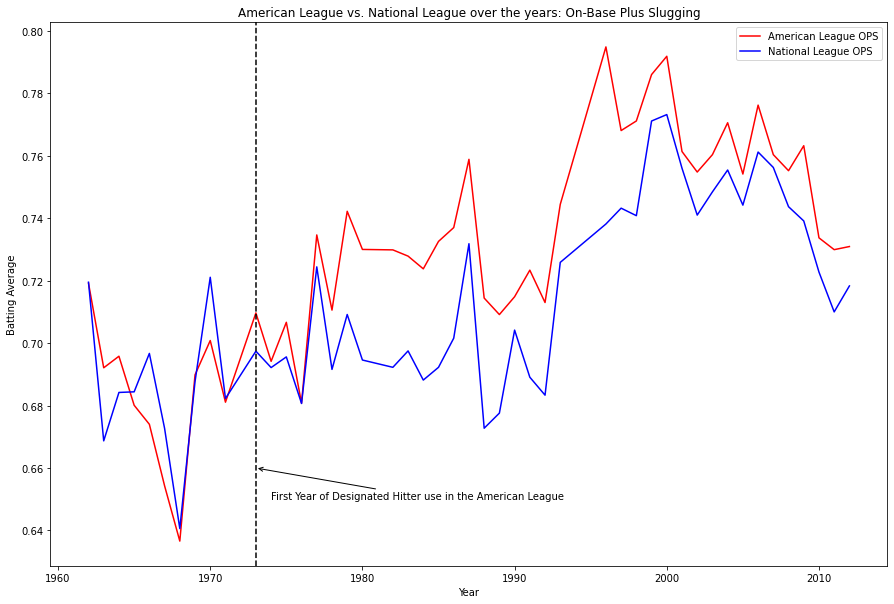

In [87]:
fig = plt.figure()
plt.plot(baseball.query('League == "AL"').pivot_table('OPS', 'Year'), label='American League OPS', color="Red")
plt.plot(baseball.query('League == "NL"').pivot_table('OPS', 'Year'), label='National League OPS', color="Blue")
plt.xlabel("Year")
plt.ylabel("Batting Average")
plt.title("American League vs. National League over the years: On-Base Plus Slugging")
plt.annotate('First Year of Designated Hitter use in the American League', xy=(1973, 0.66), xytext=(1974, 0.65), arrowprops={'arrowstyle':'->'})
plt.axvline(x=1973, color='Black', linestyle="--")
fig.set_size_inches(15, 10)
plt.legend()

The above plot illustrated the difference the Designated Hitter made. In years 1962-1972, the NL and AL were about even, with the NL surpassing the AL in this statistic about half the time. Since 1973, however, the NL mean OPS never eclipsed its AL counterpart, confirming the advantage the DH provided for the AL.

Even when considering the full dataset, the American League's offensive dominance is noticeable:

In [ ]:
cols = [['RS', 'Runs Scored'], ['RA', 'Runs Against'], ['BA', 'Batting Average'], ['OBP', 'On-Base Percentage'], ['SLG', 'Slugging Percentage'], ['OPS', 'On-Base + Slugging']]
def histplots():
  for i in range(6):
    plt.subplot(6, 3, i+1)
    sns.histplot(baseball, x=cols[i][0], hue='League', kde=True, palette={'AL':'orange', 'NL':'cyan'})
    plt.axvline(x=baseball[baseball.League=='NL'][cols[i][0]].mean(), color='Blue', linewidth=2, linestyle='dotted')
    plt.axvline(x=baseball[baseball.League=='AL'][cols[i][0]].mean(), color='Red', linewidth=2, linestyle='dotted')
    plt.xlabel(cols[i][1])

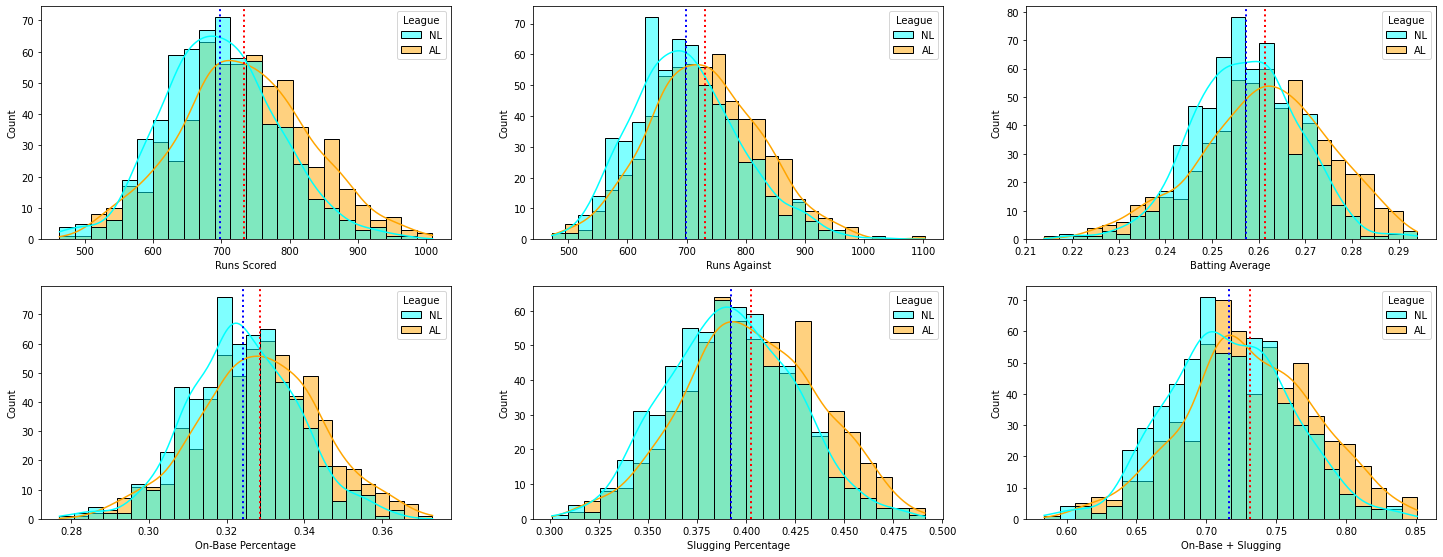

In [ ]:
fig = plt.figure()
fig.set_size_inches(25, 30)
histplots()

The above visualization displays the distributions of the six team offense statistics featured in the dataset along with their approximated continuous lines and means (indicated by the dotted vertical lines in appropriate colours, red for American and blue for National). Clearly, the American League's distribution is shifted to the right, implying that the AL is slightly superior to the NL offensively, which could be explained by the fact that 1 of the 9 members of NL teams' lineups will be a significantly less offensively effective player. To confirm these differences,we can use the independent t-Test:

In [ ]:
for i in cols:
  print(f'{i[1]}: {stats.ttest_ind(baseball[baseball.League == "AL"][i[0]], baseball[baseball.League == "NL"][i[0]])}')

Runs Scored: Ttest_indResult(statistic=6.760025889993471, pvalue=2.1257717778586947e-11)
Runs Against: Ttest_indResult(statistic=5.891237899536072, pvalue=4.941892174205654e-09)
Batting Average: Ttest_indResult(statistic=5.603857806478393, pvalue=2.5849917774077513e-08)
On-Base Percentage: Ttest_indResult(statistic=5.232166986498961, pvalue=1.9678976887017773e-07)
Slugging Percentage: Ttest_indResult(statistic=5.654478520200486, pvalue=1.9418740033372635e-08)
On-Base + Slugging: Ttest_indResult(statistic=5.795387166490485, pvalue=8.652280058108657e-09)


The positive value of the statistic in each case indicates that the American League is, on average, indeed superior to the National League in all offensive metrics. Since the p-value is sufficiently small in each case, we can be confident that these results are statistically significant.

We can also take a look at the numbers since 1973:

In [ ]:
# after 1973:
for i in cols:
  print(i[1], ":", stats.ttest_ind(baseball.query("Year >= 1973 and League == 'AL'")[i[0]], baseball.query("Year >= 1973 and League == 'NL'")[i[0]]))

Runs Scored : Ttest_indResult(statistic=8.393057530292529, pvalue=1.5701135348050886e-16)
Runs Against : Ttest_indResult(statistic=7.261632710567863, pvalue=7.588311198424326e-13)
Batting Average : Ttest_indResult(statistic=9.384537904515238, pvalue=3.990310713264737e-20)
On-Base Percentage : Ttest_indResult(statistic=6.5999582510654955, pvalue=6.605613351804521e-11)
Slugging Percentage : Ttest_indResult(statistic=6.9183057943360335, pvalue=8.068743076896883e-12)
On-Base + Slugging : Ttest_indResult(statistic=7.225250332608927, pvalue=9.794562619529733e-13)


When comparing the two leagues only for years 1973-2012, the t-Statistics are greater, indicating - as expected - that AL's offensive superiority is more pronounced when only considering the years since 1973, when the DH was instituted.

In [ ]:
for i in cols:
  print(i[1], ":", stats.ttest_ind(baseball.query("Year < 1973 and League == 'AL'")[i[0]], baseball.query("Year < 1973 and League == 'NL'")[i[0]]))

Runs Scored : Ttest_indResult(statistic=-0.8837004716392577, pvalue=0.377868488791513)
Runs Against : Ttest_indResult(statistic=-0.9008936880066312, pvalue=0.3686768495759304)
Batting Average : Ttest_indResult(statistic=-4.354300574648375, pvalue=2.0856519545961715e-05)
On-Base Percentage : Ttest_indResult(statistic=-0.5717908636373753, pvalue=0.5680751890498434)
Slugging Percentage : Ttest_indResult(statistic=-0.6082465942885119, pvalue=0.5436812241290103)
On-Base + Slugging : Ttest_indResult(statistic=-0.6282306154445441, pvalue=0.5305355076798622)


Unfortunately, for years 1962-1973 there is likely not enough of a sample size to determine much - the p-values are all quite high. One notable exception however is Batting Average, where we can see that the AL is actually inferior on average before they replaced pitchers with designated hitters.

#### b) Does this difference affect the outcomes of the World Series in any significant manner?

Given the observed difference between the AL and NL, we might wonder whether this will have an impact on the results of the World Series, the annual championship series of games between the winners of the two leagues that determine the winner of an MLB season. If American League teams are, on average, stronger than their National League counterparts, perhaps the competition in the championship is not exactly fair?  To test this, we can visualize the World Series winners over the years with a stripplot:

In [ ]:
# First, we can create a new "Won World Series" column in the dataframe:
baseball['Won_WS'] = [x == 1 for x in baseball.RankPlayoffs]

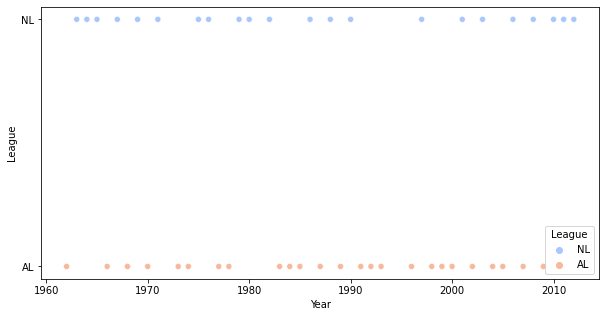

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 5)
sns.scatterplot(data=baseball[baseball.Won_WS==True], x='Year', y='League', hue='League', palette='coolwarm')

The plot does not at a glance display any advantage to either league. Indeed, if we obtain the numeric representation:

In [ ]:
baseball.groupby('League').Won_WS.sum()

League
AL    25
NL    22
Name: Won_WS, dtype: int64

We see that the AL has only 3 more World Series wins than the NL over the span 1962-2012. A statistical test should indicate whether this difference is significant:

In [ ]:
stats.ttest_ind(baseball[baseball.League == 'AL'].Won_WS, baseball[baseball.League == 'NL'].Won_WS)

Ttest_indResult(statistic=0.4458623481387174, pvalue=0.6557751508425699)

Clearly, the small overall sample size (n = 47) provides us no useful conclusions for whether the AL team is on average more likely to win in the World Series against the NL team based on our data. The p-value of 0.65 lets us know that the statistic that slightly favours the AL is rather likely to be random. Indeed, when we consider that in the World Series the AL team often has to travel to the NL park where NL rule of pitchers hitting applies to both teams, it is easy to understand why the regular season offensive superiority of the American League might not translate to greater World Series success.

### 3. Individual teams' success analysis. Which teams have been the most successful? Are there teams that have been successful despite no record of outstanding in-season performance?

#### a) Playoff Scores

To analyze each team's success over the years, we can begin by turning the ordinal variable `RankPlayoffs` into a numerical score:

${PlayoffScore = -(RankPlayoffs*2 - 12)}$

With this formula, a World Series winner will be given 10 points, the runner-up - 8; the third place teams will get 6, fourth place - 4, and 5th place - 2 points (with non-playoff teams all receiving a 0 on the year). We can then see if the team with the highest aggregated score is indeed the most successful team, as well as how these results relate to in-season offensive or overall performance.

In [ ]:
baseball['PlayoffScore'] = [-1*(x * 2 - 12) for x in baseball.RankPlayoffs]

Using this new variable, we can aggregate all the teams' playoff scores from the entire span of the dataset:

In [ ]:
baseball.pivot_table('PlayoffScore', 'Team', aggfunc='sum').sort_values(by='PlayoffScore', ascending=False)

,PlayoffScore
Team,
NYY,168.0
STL,120.0
LAD,98.0
ATL,94.0
OAK,90.0
BOS,86.0
BAL,82.0
PHI,76.0
SFG,68.0


Using the `Won_WS` variable from before, we can compare the team scores to World Series win totals:

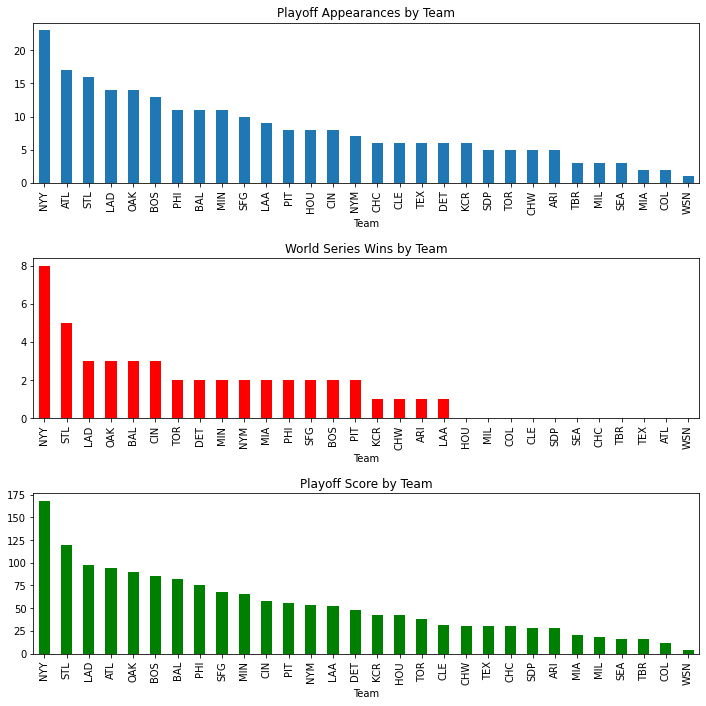

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.subplots_adjust(wspace=1.2)
plt.subplot(3, 1, 1)
baseball.groupby('Team').Playoffs.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Playoff Appearances by Team')
plt.tight_layout(pad=1.4)
plt.subplot(3, 1, 2)
baseball.groupby('Team').Won_WS.sum().sort_values(ascending=False).plot(kind='bar', color='Red')
plt.title('World Series Wins by Team')
plt.tight_layout(pad=1.4)
plt.subplot(3, 1, 3)
baseball.groupby('Team').PlayoffScore.sum().sort_values(ascending=False).plot(kind='bar', color='Green')
plt.title('Playoff Score by Team')
plt.tight_layout(pad=1.4)

As we see, this aggregation gives a bit more weight to teams that have had more success in the playoffs. For example, as featured in our dataset, despite having second-most playoff appearances, the Atlanta Braves (ATL) have not won the World Series. Meanwhile, the St. Louis Cardinals (STL), the winners of 6 World Series titles, have made more of their opportunities, which allowed them to leap over the Braves in the last graph. (The Braves did win in 1995, but that season is unfortunately not featured in the dataset due to it having been shortened by a player strike. Even factoring that season in, however, the Braves would have only overtaken the Los Angeles Dodgers (LAD) and would have ended up in 3rd place behind the Cardinals.)

Since every team has at least one playoff appearance, we can also measure the playoff effectiveness, which is a metric of average success given playoff qualification:

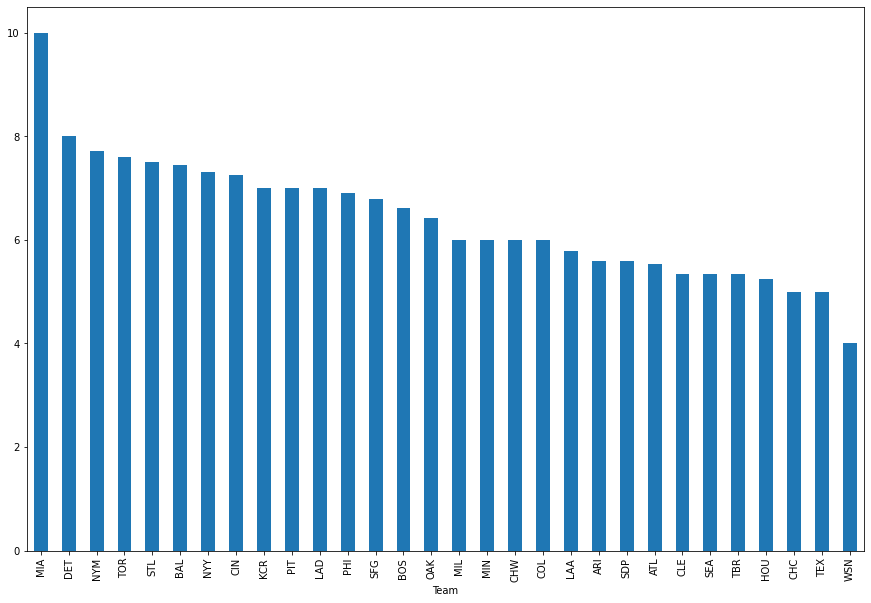

In [ ]:
playoff_effectiveness = baseball.groupby('Team').PlayoffScore.sum() / baseball.groupby('Team').Playoffs.sum()
fig = plt.figure()
playoff_effectiveness.sort_values(ascending=False).plot(kind='bar')
fig.set_size_inches(15, 10)

Interestingly, though not necessarily surprisingly, the overall most successful teams fall behind teams that made the most of their opportunities here. The Miami (then Florida) Marlins (MIA) qualified for the playoffs only twice, winning the World Series each time - resulting in a perfect 10. Some other teams that were middle of the pack in overall success might edge ahead by their effectiveness given playoff appearance. On the other hand, teams like the Atlanta Braves (ATL) fall back quite significantly due to their lack of playoff success (even when factoring in the Braves' World Series win in 1995, their playoff effectiveness would have been less than 6: since their playoff score as featured in the dataset is 94 and they qualified for the playoffs 17 times, adding 10 to the former and 1 to the latter gives the ratio 104/18 ~= 5.78).

When comparing these figures to the overall ranking of some of the offensive statistics, such as Batting Average, the findings are somewhat surprising, and upon further review, reveal a slight flaw with using a stat whose mean varies so much across the 50 years:

In [ ]:
baseball.groupby('Team').BA.mean().sort_values(ascending=False)

Team
COL    0.275833
BOS    0.269511
MIN    0.266149
KCR    0.265325
NYY    0.264596
STL    0.264319
TOR    0.263091
SEA    0.261515
CLE    0.260894
TEX    0.260596
PIT    0.260532
MIL    0.259275
CHW    0.259234
DET    0.259085
MIA    0.259000
BAL    0.258830
CIN    0.258766
TBR    0.258467
ARI    0.258267
LAA    0.257872
ATL    0.257766
CHC    0.257277
LAD    0.256766
PHI    0.256617
SFG    0.255872
HOU    0.253660
WSN    0.253525
OAK    0.252957
SDP    0.251025
NYM    0.251000
Name: BA, dtype: float64

In [ ]:
baseball.Team.value_counts()

TEX    47
BOS    47
CHW    47
CIN    47
NYY    47
CHC    47
SFG    47
STL    47
PHI    47
LAD    47
ATL    47
CLE    47
OAK    47
PIT    47
HOU    47
BAL    47
DET    47
NYM    47
LAA    47
MIN    47
MIL    40
SDP    40
KCR    40
WSN    40
TOR    33
SEA    33
COL    18
MIA    18
ARI    15
TBR    15
Name: Team, dtype: int64

We can see that some of the best teams offensively (particularly the Colorado Rockies (COL)) have only entered the league later on. Since offensive statistics grew over time (as we saw in question 1), these teams will enjoy a higher total average than teams that have been in the league in the 60s where offenses weren't as prolific. 

#### b) Run Differential

Since Batting Average can be somewhat uneven as a measure of performance, we can resort to another metric that will not be affected as much with the passing of time. The natural choice is the Run Differential, which is the difference between Runs Scored and Runs Against:

In [ ]:
baseball['RD'] = baseball.RS - baseball.RA
baseball.RD.describe()

count    1232.000000
mean        0.000000
std       102.785376
min      -337.000000
25%       -72.000000
50%         4.000000
75%        74.000000
max       309.000000
Name: RD, dtype: float64

Since the run differential is a distribution of a fixed quantity of runs in each season, its mean across each season - as well as across the entire dataset - will be 0:

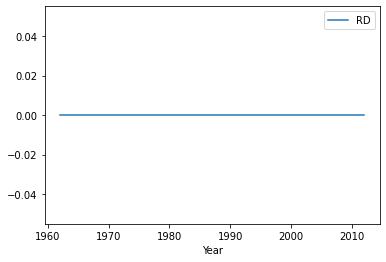

In [ ]:
baseball.pivot_table('RD', 'Year').plot()

In [ ]:
stats.pearsonr(baseball.W, baseball.RD)

(0.9378510718732695, 0.0)

We see that Win totals are very strongly correlated with the Run Differential variable with a p-value that is effectively 0.

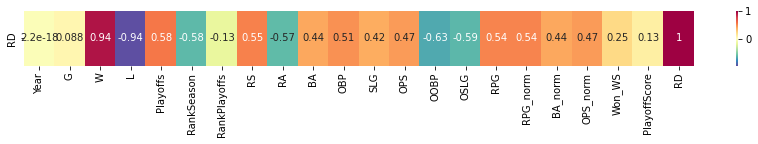

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 1)
corr = pd.DataFrame(baseball.corr().RD).transpose()
sns.heatmap(corr, cmap='Spectral_r', annot=True)

From the above heatmap, we can also gather that Run Differential is one of the stronger predictors of qualifying for the playoffs:

In [ ]:
stats.pearsonr(baseball.Playoffs, baseball.RD)

(0.5810944099792594, 3.568195142007364e-112)

As well as that On-Base Percentage is the highest contributor to a positive Run Differential:

In [ ]:
stats.pearsonr(baseball.OBP, baseball.RD)

(0.506379404003787, 3.295385660646469e-81)

Using the summed run differential across the length of the dataset we can see:

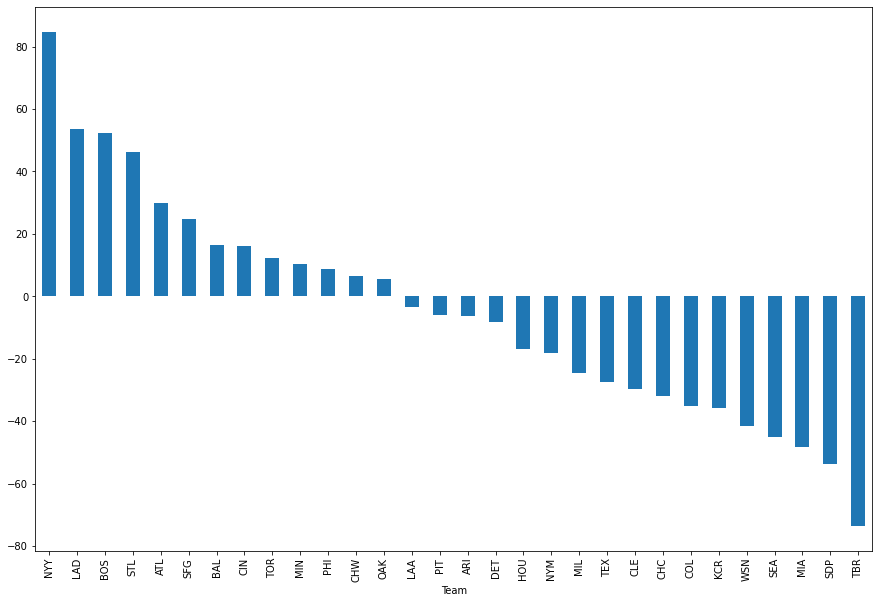

In [ ]:
fig = plt.figure()
baseball.groupby('Team').RD.mean().sort_values(ascending=False).plot(kind='bar')
fig.set_size_inches(15, 10)

#### c) Expected vs. Observed Team Run Differentials

We can divide this continuous Run Differential variable into five quantiles, or quintiles, and formulate a contingency table with the differential between observed and expected frequencies for these quintiles of run differentials. Through this, we should see which teams have been generally more successful than others.

In [ ]:
RD_cut = pd.qcut(baseball.RD, q=5, labels=['0 - .20', '.20 - .40', '.40 - .60', '.60 - .80', '.80 - 1'])
baseball_by_team = pd.crosstab(baseball.Team, RD_cut)
baseball_by_team

RD,0 - .20,.20 - .40,.40 - .60,.60 - .80,.80 - 1
Team,,,,,
ARI,4,1,4,3,3
ATL,9,8,2,10,18
BAL,11,6,8,11,11
BOS,2,6,11,11,17
CHC,12,15,8,7,5
CHW,8,10,7,14,8
CIN,7,8,12,9,11
CLE,10,17,9,5,6
COL,5,5,4,2,2


We can visualize the comparison between the observed frequency of each team in each quintile to the expected frequency using the following heatmap (teams sorted by magnitude of positive differential in the highest quintile, i.e., by the best performers):

In [ ]:
stats.chi2_contingency(baseball_by_team)

(240.92584716326834,
 9.058852121101296e-11,
 116,
 array([[3.01948052, 2.98295455, 3.00730519, 2.98295455, 3.00730519],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [3.62337662, 3.57954545, 3.60876623, 3.57954545, 3.60876623],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [8.05194805, 7.95454545, 8.01948052, 7.95454545, 8.01948052],
        [9.46103896, 9.34659091, 9.42288961, 9.34659091, 9.42288961],
        [9.46103896, 9.34659091, 9.4228

Text(0.5, 15.0, 'Run Differential Quintile')

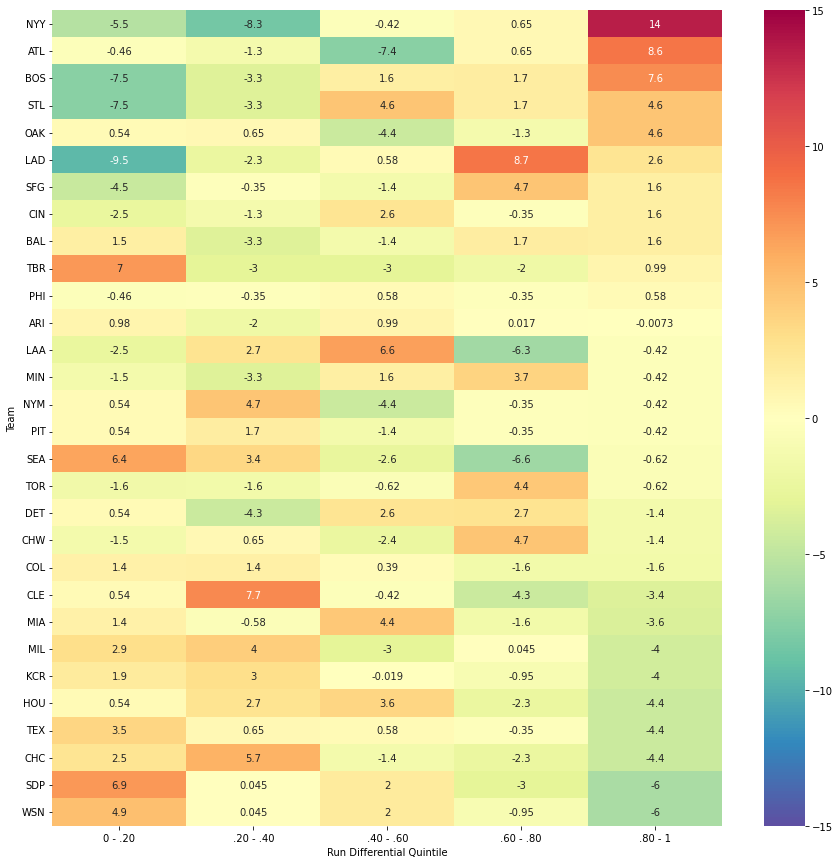

In [ ]:
obs_vs_expected = baseball_by_team - stats.contingency.expected_freq(baseball_by_team)
fig = plt.figure()
sns.heatmap(obs_vs_expected.sort_values(by='.80 - 1', ascending=False), center=0, cmap='Spectral_r', vmax = 15, vmin = -15, annot=True, yticklabels=True)
fig.set_size_inches(15, 15)
plt.xlabel("Run Differential Quintile")

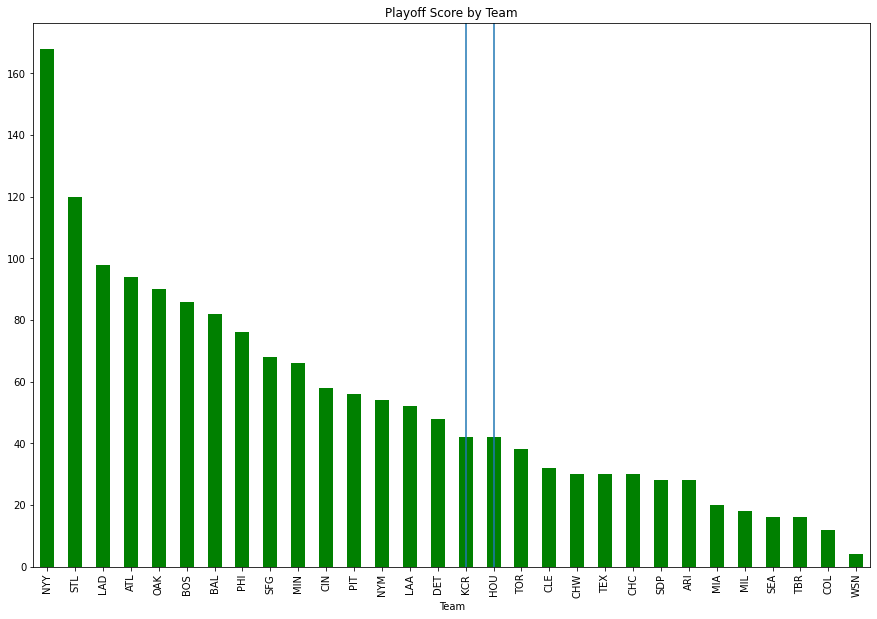

In [ ]:
fig = plt.figure()
baseball.groupby('Team').PlayoffScore.sum().sort_values(ascending=False).plot(kind='bar', color='Green')
plt.title('Playoff Score by Team')
fig.set_size_inches(15, 10)
plt.axvline(x=15)
plt.axvline(x=16)

In [ ]:
baseball.groupby('Team').PlayoffScore.sum().describe()

count     30.000000
mean      53.400000
std       36.472569
min        4.000000
25%       28.500000
50%       45.000000
75%       74.000000
max      168.000000
Name: PlayoffScore, dtype: float64

In both plots, the same group: New York Yankees (NYY), Los Angeles Dodgers (LAD), Boston Red Sox (BOS), St. Louis Cardinals (STL), Atlanta Braves (ATL), and Oakland Athletics (OAK) are up on top. However, there are teams whose Run Differential hasn't been too spectacular throughout the dataset, but despite that, those teams have had some success. The Kansas City Royals (KCR) and the Houston Astros (HOU) are both in the bottom fifth of the league as far as the differential between the observed and expected frequencies of higher percentile Run Differentials. Nevertheless, both of these teams are roughly in the middle of the league as far as Playoff Success(15th and 16th out of 30, respectively). These results reaffirm that lack of consistently good performance does not preclude a measure of overall success, though the better performers have clearly had significantly more success. 

### 4. How do playoff teams fare with respect to their offensive statistics as compared to the league average? Has any team ever made the playoffs with below-average offense? Won the World Series?

#### a) Playoff Teams vs. Non-Playoff Teams

To see the difference between Playoff-bound teams and those that failed to qualify, we can group the dataframe by the boolean `Playoffs` and look at the means of each offensive statistic we have access to in our dataset:

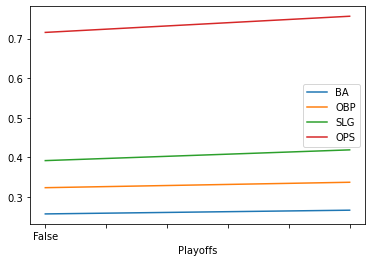

In [ ]:
baseball.groupby('Playoffs')[['BA', 'OBP', 'SLG', 'OPS']].mean().plot()

This very basic preliminary step would indicate that playoff teams are, on average, offensively superior to non-playoff teams. This, of course, can be confirmed with t-Tests:

In [ ]:
for i in ['BA', 'OBP', 'SLG', 'OPS']:
  print(f'{i}: {stats.ttest_ind(baseball[baseball.Playoffs == True][i], baseball[baseball.Playoffs == False][i])}')

BA: Ttest_indResult(statistic=10.636070387287988, pvalue=2.45620368280867e-25)
OBP: Ttest_indResult(statistic=13.701472039047117, pvalue=7.164876596580685e-40)
SLG: Ttest_indResult(statistic=12.040558822320946, pvalue=1.2100082447168517e-31)
OPS: Ttest_indResult(statistic=13.235637791215886, pvalue=1.7485072843734623e-37)


Playoff teams are, therefore, on average better in each category than non-playoff teams. However, while on average this is true, what are some outliers to this rule?

#### b) Best Non-Playoff Teams vs. Worst Playoff Teams

 To look into this matter further, we can plot the best teams (as measured by Run Differential) that did not qualify versus the weakest that did:

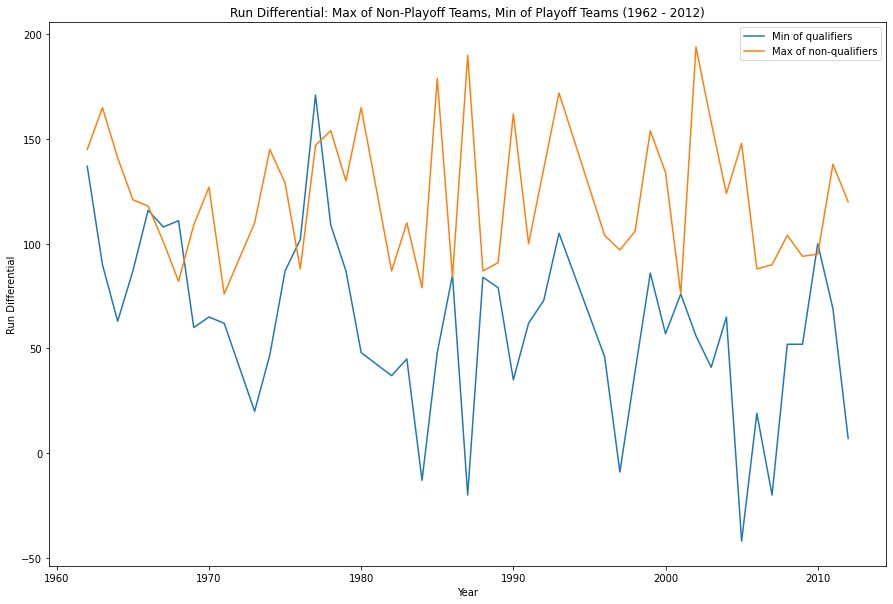

In [ ]:
fig = plt.figure()
plt.plot(baseball[baseball.Playoffs == True].pivot_table('RD', 'Year', 'Playoffs', aggfunc='min'), label='Min of qualifiers')
plt.plot(baseball[baseball.Playoffs == False].pivot_table('RD', 'Year', 'Playoffs', aggfunc='max'), label='Max of non-qualifiers')
fig.set_size_inches(15, 10)
plt.xlabel('Year')
plt.ylabel('Run Differential')
plt.title("Run Differential: Max of Non-Playoff Teams, Min of Playoff Teams (1962 - 2012)")
plt.legend()

According to the above plot, it would appear that there were years where teams qualified despite an inferior Run Differential than others contenders. It is worth noting at this point, however, that the MLB playoff format has changed a few times in the period spanned by this dataset. Until 1969 for example, the "playoffs" consisted of just the World Series, where the best team in the American League played against the best team in the National League. Individual League championships were added prior to the 1969 season, expanding the playoffs to four teams (two winners of the Eastern and Western divisions in each league). It is not until 1993 that eight teams competed in the playoffs. As such, it is rather likely, especially in the earlier decades, that some great teams missed out on postseason competition as a result of other powerhouses in their League in that year. Perhaps by focusing on each league separately, the playoff competition will better reflect statistical performance:

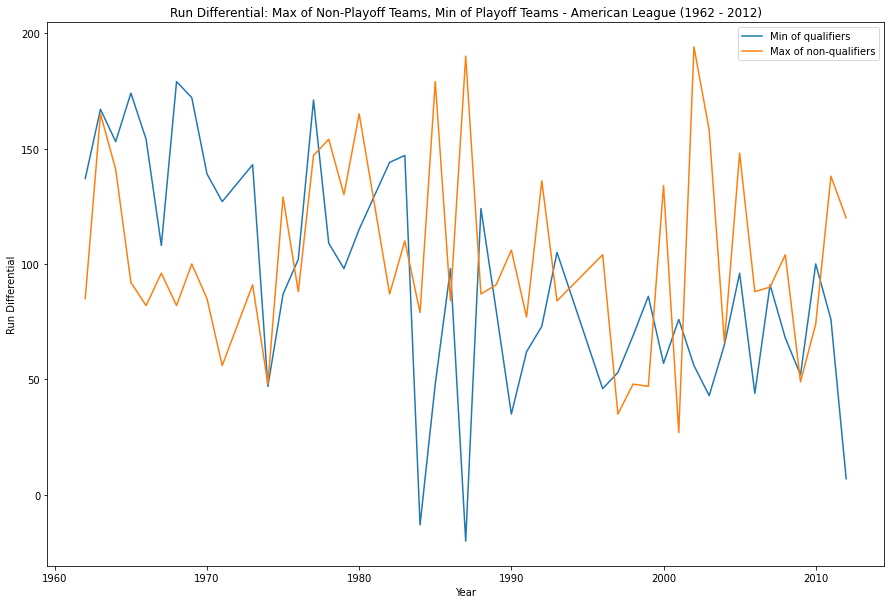

In [ ]:
fig = plt.figure()
plt.plot(baseball.query('Playoffs and League == "AL"').pivot_table('RD', 'Year', 'Playoffs', aggfunc='min'), label='Min of qualifiers')
plt.plot(baseball.query('not Playoffs and League == "AL"').pivot_table('RD', 'Year', 'Playoffs', aggfunc='max'), label='Max of non-qualifiers')
plt.xlabel('Year')
plt.ylabel('Run Differential')
plt.title("Run Differential: Max of Non-Playoff Teams, Min of Playoff Teams - American League (1962 - 2012)")
fig.set_size_inches(15, 10)
plt.legend()

In an attempt to alleviate the discrepancy between playoff-qualifying teams and Run Differential performance, we have found a deeper problem - these per-League graphs indicate that it is actually quite often that inferior teams make the playoffs over teams that would perhaps be better suited when judged by their performance.

#### c) The 1987 Minnesota Twins

The year 1987 provides the largest gap between the two plots, and tells a rather interesting story. Out of the two teams that competed in the American League Championship Series (ALCS) in 1987, the Minnesota Twins (MIN) were by far the underdog. Having won a rather paltry 85 games, they were the worst record in that year's playoffs (both AL and NL), as indicated by the 4 in RankSeason column. They weren't terrible - the normalized statistics tell us they were about .75 SD above the average AL team in the Runs-Per-Game and OPS categories, but they weren't anything close to their opponent. Their ALCS competitor - the Detroit Tigers (DET) - were an offensive juggernaut, averaging 5.53 runs per game (the best in the AL that year) and with the second best Run Differential of 161. Nevertheless, the Twins defeated the Tigers and then went on to win the World Series (!) against the NL champion.

In [ ]:
baseball.query('Playoffs and League == "AL" and Year == 1987')

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,Decade,RPG,RPG_norm,BA_norm,OPS_norm,Won_WS,PlayoffScore,RD
672,DET,AL,1987,162,98,64,True,1.0,3.0,896,735,0.272,0.349,0.451,0.800,NaN,NaN,80s,5.530864,1.975721,0.986058,1.656908,False,6.0,161
677,MIN,AL,1987,162,85,77,True,4.0,1.0,786,806,0.261,0.328,0.430,0.758,NaN,NaN,80s,4.851852,0.772186,0.133822,0.745172,True,10.0,-20


In [ ]:
baseball.query('not Playoffs and League == "AL" and Year == 1987')

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,Decade,RPG,RPG_norm,BA_norm,OPS_norm,Won_WS,PlayoffScore,RD
665,BAL,AL,1987,162,67,95,False,NaN,NaN,729,880,0.258,0.322,0.418,0.740,NaN,NaN,80s,4.500000,0.148536,-0.098606,0.354429,False,NaN,-151
666,BOS,AL,1987,162,78,84,False,NaN,NaN,842,825,0.278,0.352,0.430,0.782,NaN,NaN,80s,5.197531,1.384895,1.450914,1.266164,False,NaN,17
667,LAA,AL,1987,162,75,87,False,NaN,NaN,770,803,0.252,0.326,0.401,0.727,NaN,NaN,80s,4.753086,0.597126,-0.563462,0.072225,False,NaN,-33
669,CHW,AL,1987,162,77,85,False,NaN,NaN,748,746,0.258,0.319,0.415,0.734,NaN,NaN,80s,4.617284,0.356419,-0.098606,0.224181,False,NaN,2
671,CLE,AL,1987,162,61,101,False,NaN,NaN,742,957,0.263,0.324,0.422,0.746,NaN,NaN,80s,4.580247,0.290772,0.288774,0.484677,False,NaN,-215
674,KCR,AL,1987,162,83,79,False,NaN,NaN,715,691,0.262,0.328,0.412,0.740,NaN,NaN,80s,4.413580,-0.004642,0.211298,0.354429,False,NaN,24
676,MIL,AL,1987,162,91,71,False,NaN,NaN,862,817,0.276,0.346,0.428,0.774,NaN,NaN,80s,5.320988,1.603720,1.295962,1.092500,False,NaN,45
680,NYY,AL,1987,162,89,73,False,NaN,NaN,788,758,0.262,0.336,0.418,0.754,NaN,NaN,80s,4.864198,0.794068,0.211298,0.658341,False,NaN,30
681,OAK,AL,1987,162,81,81,False,NaN,NaN,806,789,0.260,0.333,0.428,0.761,NaN,NaN,80s,4.975309,0.991011,0.056346,0.810296,False,NaN,17
685,SEA,AL,1987,162,78,84,False,NaN,NaN,760,801,0.272,0.335,0.428,0.763,NaN,NaN,80s,4.691358,0.487714,0.986058,0.853712,False,NaN,-41


This instance exemplifies the relative "unfairness" of the earlier MLB playoff system. The 1987 Toronto Blue Jays (TOR) had scored the third most runs in the AL and - clearly complimented by great defense - had the best Run Differential in the American League. Nevertheless, they had the bad luck of playing in the same Eastern division as the Detroit Tigers who won 2 more games and thus qualified to the AL Championship over the Blue Jays. Meanwhile, the Western AL division that year must have been particularly bad - the Twins were able to win it with just 85 wins. While over on the NL side there are no such drastic discrepancies, there are also instances of inferior (at least as far as Run Differential) teams qualifying due to the divisional structure:

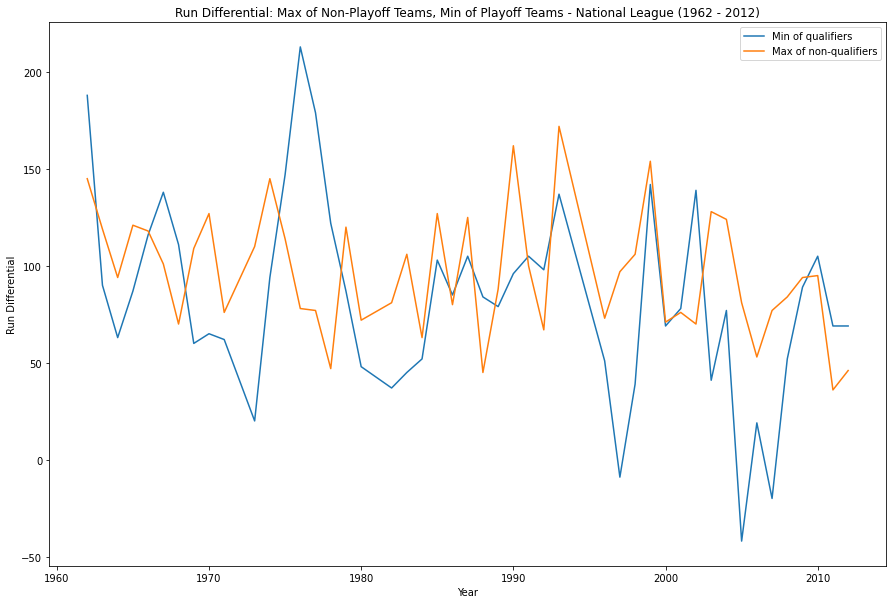

In [ ]:
fig = plt.figure()
plt.plot(baseball.query('Playoffs == True and League == "NL"').pivot_table('RD', 'Year', 'Playoffs', aggfunc='min'), label='Min of qualifiers')
plt.plot(baseball.query('Playoffs == False and League == "NL"').pivot_table('RD', 'Year', 'Playoffs', aggfunc='max'), label='Max of non-qualifiers')
plt.xlabel('Year')
plt.ylabel('Run Differential')
plt.title("Run Differential: Max of Non-Playoff Teams, Min of Playoff Teams - National League (1962 - 2012)")
fig.set_size_inches(15, 10)
plt.legend()

Under the more recent, expanded playoff rules, it would seem that these occurences of wide disparity between the worst of the best and the best of the worst are largely a thing of the past. On the other hand, instances of the better teams not qualifying because of a stronger division still occur - perhaps another playoff expansion (as is rumoured to be in the works - https://bleacherreport.com/articles/10019504-mlb-rumors-expanded-14-team-playoff-discussed-division-winners-would-pick-opponent) would further diminish this effect.

### 5. Coors Field

#### a) The Colorado Rockies Outlier

The Colorado Rockies (COL) have joined the National League as a new franchise in 1993. Throughout their MLB history, the team has played in Denver, Colorado. The elevation of their ballpark - the Coors Field - is 5211 feet above sea level, which is roughly five times the next highest elevation of 1059ft (Chase Field, home of the Arizona Diamondbacks - https://www.seamheads.com/ballparks/index.php?first=0&last=2020&active=All&state=All&sort=alt_a). As a result of this elevation, the air quality in this ballpark is different than in other fields, allowing for hit balls to travel further. Is there a significant difference in the Rockies' performance that we could glean from our dataset? Since half of an MLB teams' games are at home, the Rockies' numbers should be affected by the ballpark they play in.

Since the Rockies were introduced into the league in 1993, we ought to only take into account the years they were in the league - after all, as we have seen in question 4, the MLB offenses got more and more potent as the years advanced, which would potentially skew the numbers for this analysis. To that end, let us adjust our dataset:

In [ ]:
baseball_since_1993 = baseball.query('Year >= 1993')

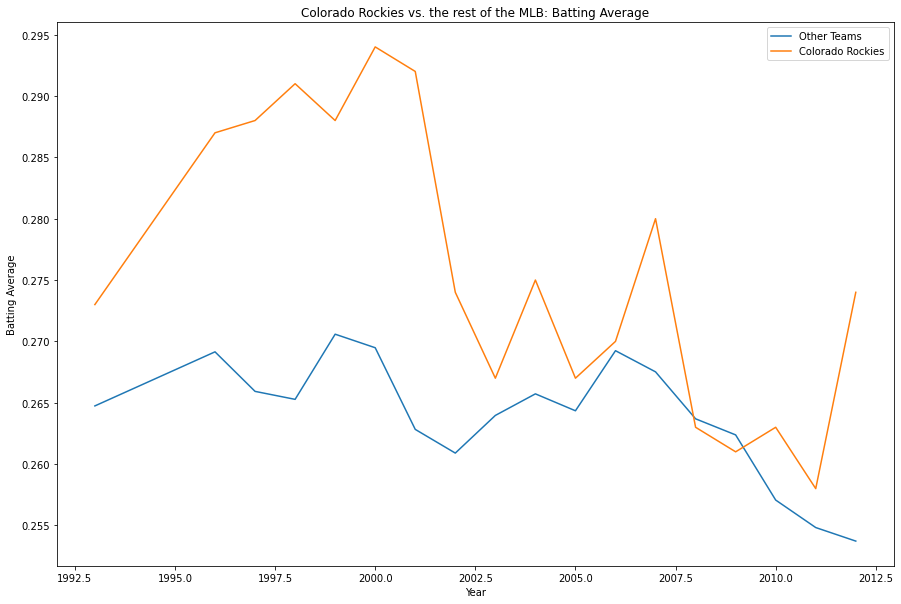

In [ ]:
fig = plt.figure()
plt.plot(baseball_since_1993.query('not Team == "COL"').pivot_table('BA', 'Year'), label='Other Teams')
plt.plot(baseball_since_1993.query('Team == "COL"').pivot_table('BA', 'Year'), label='Colorado Rockies')
plt.xlabel("Year")
plt.ylabel("Batting Average")
plt.title("Colorado Rockies vs. the rest of the MLB: Batting Average")
fig.set_size_inches(15, 10)
plt.legend()

Now we can see the results of the Colorado Rockies versus the rest of the league. As above, their location has led to significantly higher offensive metrics than the league average in most years. It is interesting to note that the bulk of the increase in offensive potency happens prior to the 2002 season. Indeed, studies have shown that it was the dryness of the air in Coors Field that caused baseballs to become harder and easier to hit farther. Before the 2002 season, the Rockies installed humidors which lowered the impact of the park to nearly league-average since (https://www.denverpost.com/2006/06/20/more-humidors-likely-on-horizon/).

Despite the above advantage, especially in the first decade, we can see that the Rockies win total did not follow along at all:

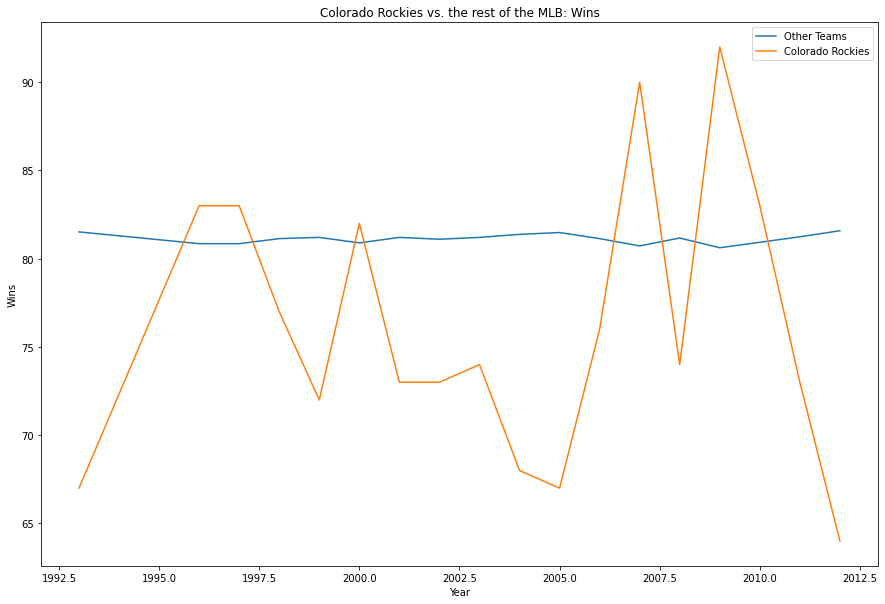

In [ ]:
fig = plt.figure()
plt.plot(baseball_since_1993.query('not Team == "COL"').pivot_table('W', 'Year'), label='Other Teams')
plt.plot(baseball_since_1993.query('Team == "COL"').pivot_table('W', 'Year'), label='Colorado Rockies')
plt.xlabel("Year")
plt.ylabel("Wins")
plt.title("Colorado Rockies vs. the rest of the MLB: Wins")
fig.set_size_inches(15, 10)
plt.legend()

If we graph the data jointly, we can see that the Colorado Rockies are quite the outlier:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


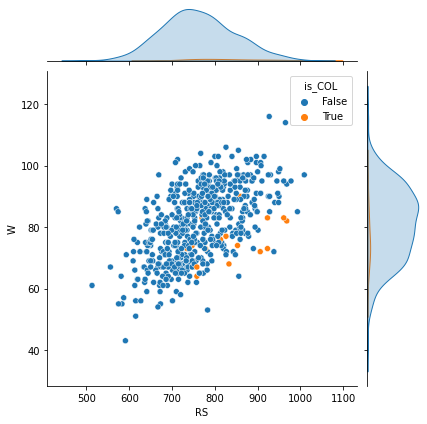

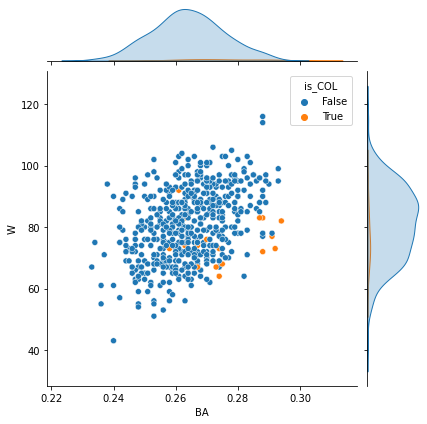

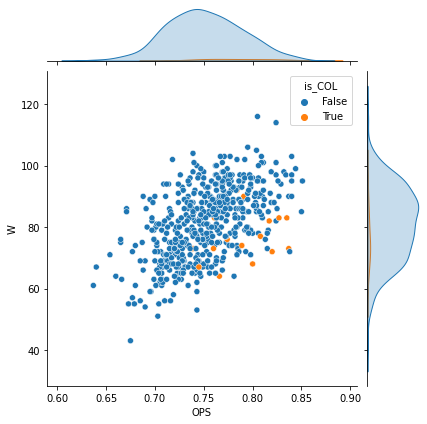

In [ ]:
# an indicator variable for seaborn hues
baseball_since_1993['is_COL'] = [x == 'COL' for x in baseball_since_1993.Team]
sns.jointplot(data=baseball_since_1993, kind='scatter', x='RS', y='W', hue='is_COL')
sns.jointplot(data=baseball_since_1993, kind='scatter', x='BA', y='W', hue='is_COL')
sns.jointplot(data=baseball_since_1993, kind='scatter', x='OPS', y='W', hue='is_COL')

The above jointplots tell most of the story. Nearly all of the yellow dots representing the Rockies end up in the bottom left quadrant, indicating solid offensive performance and low win totals, not following the expected trend of the rising together. For example, there have been

In [ ]:
len(baseball_since_1993.query('RS > 900'))

31

31 teams to score more than 900 runs in a season since 1993. 

In [ ]:
len(baseball_since_1993.query('RS > 900')) / len(baseball_since_1993)

0.05805243445692884

This is approximately 6% of all team seasons in the Years 1993-2012 ending with 900 runs or more. The Colorado Rockies have done it 5 times, the most in the league, with highly successful teams such as the New York Yankees (NYY) and Boston Red Sox (BOS) among those coming up *ex aequo* in second place with 4 each:

In [ ]:
baseball_since_1993.query('RS > 900').Team.value_counts()

COL    5
TEX    4
SEA    4
BOS    4
NYY    4
CLE    3
HOU    1
BAL    1
ARI    1
OAK    1
ATL    1
SFG    1
CHW    1
Name: Team, dtype: int64

It is worth noting that on this list of teams there are only four other National League teams (which we have shown to be generally lesser offensively than AL teams):

In [ ]:
baseball_since_1993.query('RS > 900 & League == "NL" & not is_COL')

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,Decade,RPG,RPG_norm,BA_norm,OPS_norm,Won_WS,PlayoffScore,RD,is_COL
272,ATL,NL,2003,162,101,61,True,1.0,4.0,907,740,0.284,0.349,0.475,0.824,0.327,0.401,2000s,5.598765,2.096075,1.915769,2.177900,False,4.0,167,False
372,HOU,NL,2000,162,72,90,False,NaN,NaN,938,944,0.278,0.361,0.477,0.838,0.353,0.476,90s,5.790123,2.435253,1.450914,2.481811,False,NaN,-6,False
385,SFG,NL,2000,162,97,65,True,1.0,4.0,925,747,0.278,0.362,0.472,0.834,0.342,0.412,90s,5.709877,2.293017,1.450914,2.394980,False,4.0,178,False
391,ARI,NL,1999,162,100,62,True,2.0,4.0,908,676,0.277,0.347,0.459,0.806,0.320,0.402,90s,5.604938,2.107016,1.373438,1.787156,False,4.0,232,False


In other words, the Colorado Rockies have amassed more 900+ run seasons than the rest of the NL combined. 3 out of 4 of those other teams have won over 95 games and made the playoffs - i.e., were highly successful. In general, teams that score 900 runs or more since 1993:

In [ ]:
display("Teams since '93 with 900+ runs - playoff status:", baseball_since_1993.query('RS > 900').Playoffs.value_counts(), "Colorado Rockies since '93 - playoff status:",
baseball_since_1993.query('is_COL').Playoffs.value_counts())

"Teams since '93 with 900+ runs - playoff status:"

True     21
False    10
Name: Playoffs, dtype: int64

"Colorado Rockies since '93 - playoff status:"

False    16
True      2
Name: Playoffs, dtype: int64

Out of the 31 teams that scored 900 runs or more, 21 (or roughly 68%) have made the playoffs. The Rockies have made the playoffs twice in their 18 seasons represented in our dataset. Neither of those playoff appearances occured when the Colorado team scored over 900 runs, as we can see at a glance below:

In [ ]:
baseball_since_1993.query('RS > 900 and is_COL')

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,Decade,RPG,RPG_norm,BA_norm,OPS_norm,Won_WS,PlayoffScore,RD,is_COL
339,COL,NL,2001,162,73,89,False,NaN,NaN,923,906,0.292,0.354,0.483,0.837,0.350,0.480,2000s,5.697531,2.271135,2.535577,2.460104,False,NaN,17,True
369,COL,NL,2000,162,82,80,False,NaN,NaN,968,897,0.294,0.362,0.455,0.817,0.354,0.471,90s,5.975309,2.763490,2.690529,2.025944,False,NaN,71,True
399,COL,NL,1999,162,72,90,False,NaN,NaN,906,1028,0.288,0.348,0.472,0.820,0.384,0.499,90s,5.592593,2.085134,2.225673,2.091068,False,NaN,-122,True
458,COL,NL,1997,162,83,79,False,NaN,NaN,923,908,0.288,0.357,0.478,0.835,NaN,NaN,90s,5.697531,2.271135,2.225673,2.416688,False,NaN,15,True
486,COL,NL,1996,162,83,79,False,NaN,NaN,961,964,0.287,0.355,0.472,0.827,NaN,NaN,90s,5.932099,2.686901,2.148197,2.243024,False,NaN,-3,True


In [ ]:
stats.ttest_ind(baseball_since_1993.query('is_COL').BA, baseball_since_1993.query('not is_COL').BA)

Ttest_indResult(statistic=4.346574993354397, pvalue=1.6571406012400656e-05)

As above, the Rockies' offense has been - on average - better than the rest of the league in the '93-'12 timespan, especially in the years 1993-2002. Their lack of success as a result can be understood when taking into account their comparison to the rest of the league in the Runs Against category, in which the Rockies also have an 'advantage':

In [ ]:
stats.ttest_ind(baseball_since_1993.query('is_COL').RA, baseball_since_1993.query('not is_COL').RA)

Ttest_indResult(statistic=5.091532236604027, pvalue=4.937203222114928e-07)

These results stress the importance of considering ballpark-weighted statistics. While the Rockies' ballpark is certainly an outlier with regard to its elevation, parks of different sizes may offer different advantages and disadvantages that do not affect the day-to-day competition (since in any given game the same advantages and disadvantages apply to both sides) but may affect the overall statistics of the home team.

### 6. Defensive statistics - Opponent On-Base Percentage, Slugging.

#### a) OOBP, OSLG, OOPS

The baseball dataset, while primarily focused on offensive statistics, does contain some defensive data for the years 1999-2012, albeit in the rather general form of OOBP (Opponent On-Base Percentage) and OSLG (Opponent Slugging Percentage). While we do not have specific data about pitching and/or fielding, these opponents' statistics do give an overview of each team's defense. To compare the impact of these defensive statistics on the Win/Loss totals, we can isolate the portion of the dataset for the years both aspects of the game are represented (from 1999 and on):

In [ ]:
baseball_since_1999 = baseball.query('Year >= 1999')
baseball_since_1999.head()

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,Decade,RPG,RPG_norm,BA_norm,OPS_norm,Won_WS,PlayoffScore,RD
0,ARI,NL,2012,162,81,81,False,NaN,NaN,734,688,0.259,0.328,0.418,0.746,0.317,0.415,2000s,4.530864,0.203242,-0.021130,0.484677,False,NaN,46
1,ATL,NL,2012,162,94,68,True,4.0,5.0,700,600,0.247,0.320,0.389,0.709,0.306,0.378,2000s,4.320988,-0.168760,-0.950841,-0.318519,False,2.0,100
2,BAL,AL,2012,162,93,69,True,5.0,4.0,712,705,0.247,0.311,0.417,0.728,0.315,0.403,2000s,4.395062,-0.037465,-0.950841,0.093933,False,4.0,7
3,BOS,AL,2012,162,69,93,False,NaN,NaN,734,806,0.260,0.315,0.415,0.730,0.331,0.428,2000s,4.530864,0.203242,0.056346,0.137349,False,NaN,-72
4,CHC,NL,2012,162,61,101,False,NaN,NaN,613,759,0.240,0.302,0.378,0.680,0.335,0.424,2000s,3.783951,-1.120647,-1.493173,-0.948051,False,NaN,-146


In similar vein to the combining of On-Base Percentage and Slugging into a more holistic variable (On-Base + Slugging), we can do the same for these opponents' values:

In [ ]:
baseball_since_1999['OOPS'] = baseball_since_1999.OOBP + baseball_since_1999.OSLG

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
baseball_since_1999.head()

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,Decade,RPG,RPG_norm,BA_norm,OPS_norm,Won_WS,PlayoffScore,RD,OOPS
0,ARI,NL,2012,162,81,81,False,NaN,NaN,734,688,0.259,0.328,0.418,0.746,0.317,0.415,2000s,4.530864,0.203242,-0.021130,0.484677,False,NaN,46,0.732
1,ATL,NL,2012,162,94,68,True,4.0,5.0,700,600,0.247,0.320,0.389,0.709,0.306,0.378,2000s,4.320988,-0.168760,-0.950841,-0.318519,False,2.0,100,0.684
2,BAL,AL,2012,162,93,69,True,5.0,4.0,712,705,0.247,0.311,0.417,0.728,0.315,0.403,2000s,4.395062,-0.037465,-0.950841,0.093933,False,4.0,7,0.718
3,BOS,AL,2012,162,69,93,False,NaN,NaN,734,806,0.260,0.315,0.415,0.730,0.331,0.428,2000s,4.530864,0.203242,0.056346,0.137349,False,NaN,-72,0.759
4,CHC,NL,2012,162,61,101,False,NaN,NaN,613,759,0.240,0.302,0.378,0.680,0.335,0.424,2000s,3.783951,-1.120647,-1.493173,-0.948051,False,NaN,-146,0.759


The pairs OBP and OOBP, SLG and OSLG, and OPS/OOPS should - in principle - have roughly the same means:

In [ ]:
display(baseball_since_1999.pivot_table(['OBP', 'OOBP'], 'Year'),
baseball_since_1999.pivot_table(['OPS', 'OOPS'], 'Year'))
# Since OSLG = OOPS - OOBP, we just need to check two: 

,OBP,OOBP
Year,,
1999,0.344400,0.344633
2000,0.344900,0.344767
2001,0.332067,0.332033
2002,0.330933,0.330967
2003,0.332333,0.332400
2004,0.334833,0.334867
2005,0.330133,0.330000
2006,0.336400,0.336367
2007,0.335700,0.335567


,OOPS,OPS
Year,,
1999,0.778700,0.778067
2000,0.781800,0.781900
2001,0.758433,0.758500
2002,0.747433,0.747433
2003,0.753967,0.754000
2004,0.762567,0.762500
2005,0.748767,0.748833
2006,0.768133,0.768200
2007,0.758033,0.758167


#### b) Offensive vs. Defensive OBP/SLG/OPS

If one of the variables is more important for playoff qualification, therefore, we should be able to see the gap between the curves be on average wider:

Text(0.5, 1.0, "Opponents' On-Base Percentage (Playoff vs. Non-Playoff Teams)")

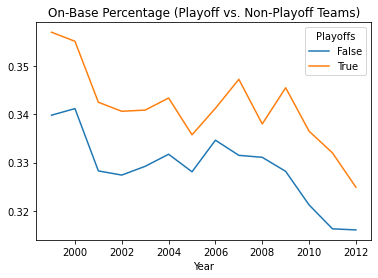

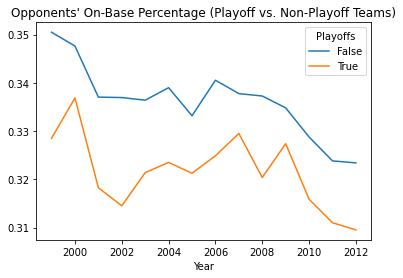

In [ ]:
baseball_since_1999.pivot_table('OBP', 'Year', 'Playoffs').plot()
plt.title('On-Base Percentage (Playoff vs. Non-Playoff Teams)')
baseball_since_1999.pivot_table('OOBP', 'Year', 'Playoffs').plot()
plt.title('Opponents\' On-Base Percentage (Playoff vs. Non-Playoff Teams)')

Text(0.5, 1.0, "Opponents' Slugging Percentage (Playoff vs. Non-Playoff Teams)")

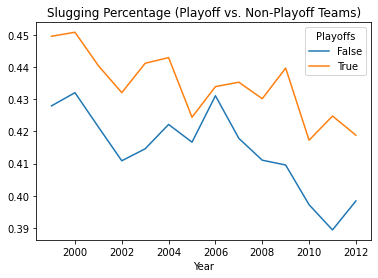

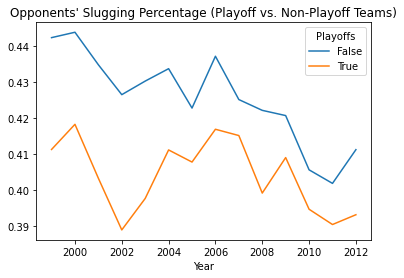

In [ ]:
baseball_since_1999.pivot_table('SLG', 'Year', 'Playoffs').plot()
plt.title('Slugging Percentage (Playoff vs. Non-Playoff Teams)')
baseball_since_1999.pivot_table('OSLG', 'Year', 'Playoffs').plot()
plt.title('Opponents\' Slugging Percentage (Playoff vs. Non-Playoff Teams)')

Text(0.5, 1.0, "Opponents' On-Base + Slugging Percentages (Playoff vs. Non-Playoff Teams)")

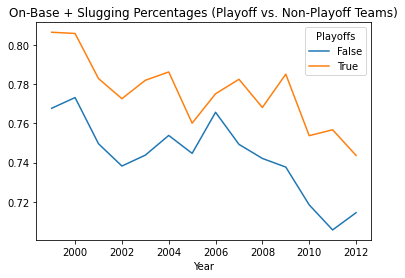

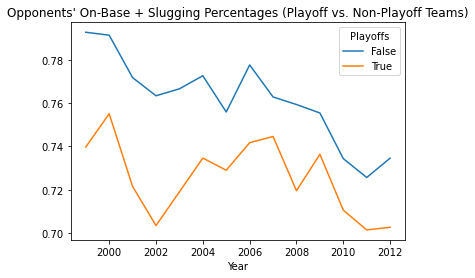

In [ ]:
baseball_since_1999.pivot_table('OPS', 'Year', 'Playoffs').plot()
plt.title('On-Base + Slugging Percentages (Playoff vs. Non-Playoff Teams)')
baseball_since_1999.pivot_table('OOPS', 'Year', 'Playoffs').plot()
plt.title('Opponents\' On-Base + Slugging Percentages (Playoff vs. Non-Playoff Teams)')

Indeed, at a glance it would seem that some of the gaps between playoff and non-playoff teams could be slightly wider on defensive or opponents' stats' graphs. Nevertheless, the visualizations alone are inconclusive, since there are years where the gaps were actually narrower (e.g. it would appear that in 2009 playoff teams distinguished themselves offensively more than defensively). To verify the significance, we can perform a series of t-Tests, comparing playoff and non-playoff teams for each of the 3 offensive and 3 defensive variables:

In [ ]:
display(stats.ttest_ind(baseball_since_1999[baseball_since_1999.Playoffs==True].OBP, baseball_since_1999[baseball_since_1999.Playoffs==False].OBP),
stats.ttest_ind(baseball_since_1999[baseball_since_1999.Playoffs==True].SLG, baseball_since_1999[baseball_since_1999.Playoffs==False].SLG),
stats.ttest_ind(baseball_since_1999[baseball_since_1999.Playoffs==True].OPS, baseball_since_1999[baseball_since_1999.Playoffs==False].OPS),
stats.ttest_ind(baseball_since_1999[baseball_since_1999.Playoffs==True].OOBP, baseball_since_1999[baseball_since_1999.Playoffs==False].OOBP),
stats.ttest_ind(baseball_since_1999[baseball_since_1999.Playoffs==True].OSLG, baseball_since_1999[baseball_since_1999.Playoffs==False].OSLG),
stats.ttest_ind(baseball_since_1999[baseball_since_1999.Playoffs==True].OOPS, baseball_since_1999[baseball_since_1999.Playoffs==False].OOPS))

Ttest_indResult(statistic=8.59809028447613, pvalue=1.6426834363869082e-16)

Ttest_indResult(statistic=7.283442051266759, pvalue=1.6315917930322497e-12)

Ttest_indResult(statistic=8.231547722212854, pvalue=2.3804545123006996e-15)

Ttest_indResult(statistic=-9.837094074321701, pvalue=1.1184850834431671e-20)

Ttest_indResult(statistic=-8.059685310466866, pvalue=8.10957367002722e-15)

Ttest_indResult(statistic=-9.123436482354924, pvalue=3.1097260648364363e-18)

In every case, there is some evidence to say that defensive statistics (giving up fewer/lower quality hits) are on average slightly more important than their offensive versions, though the difference in the statistics for each pair is very small - often less than 1. Moreover, it would appear that the impact of defensive statistics is greater on Win totals than on Playoff appearance - which is plausible, given that often teams with great Win/Loss records fail to qualify for the Playoffs due to better competition in their division (as seen in question 4c, regarding the 1987 Minnesota Twins). As we can see below, there were several teams that failed to qualify for the playoffs since 1999 despite winning over 90 games which can be considered a very good record.

In [ ]:
baseball_since_1999.query('not Playoffs & W >= 90').sort_values(by='W', ascending=False)

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,Decade,RPG,RPG_norm,BA_norm,OPS_norm,Won_WS,PlayoffScore,RD,OOPS
397,CIN,NL,1999,163,96,67,False,NaN,NaN,865,711,0.272,0.341,0.451,0.792,0.324,0.411,90s,5.306748,1.578481,0.986058,1.483244,False,NaN,154,0.735
217,CLE,AL,2005,162,93,69,False,NaN,NaN,790,642,0.271,0.334,0.453,0.787,0.302,0.387,2000s,4.876543,0.815951,0.908582,1.374704,False,NaN,148,0.689
294,SEA,AL,2003,162,93,69,False,NaN,NaN,795,637,0.271,0.344,0.410,0.754,0.311,0.388,2000s,4.907407,0.870657,0.908582,0.658341,False,NaN,158,0.699
304,BOS,AL,2002,162,93,69,False,NaN,NaN,859,665,0.277,0.345,0.444,0.789,0.308,0.385,2000s,5.302469,1.570896,1.373438,1.418120,False,NaN,194,0.693
324,SEA,AL,2002,162,93,69,False,NaN,NaN,814,699,0.275,0.350,0.419,0.769,0.315,0.410,2000s,5.024691,1.078540,1.218486,0.983960,False,NaN,115,0.725
314,LAD,NL,2002,162,92,70,False,NaN,NaN,713,643,0.264,0.320,0.409,0.729,0.315,0.387,2000s,4.401235,-0.026524,0.366250,0.115641,False,NaN,70,0.702
260,OAK,AL,2004,162,91,71,False,NaN,NaN,793,742,0.270,0.343,0.433,0.776,0.332,0.409,2000s,4.895062,0.848775,0.831106,1.135916,False,NaN,51,0.741
265,SFG,NL,2004,162,91,71,False,NaN,NaN,850,770,0.270,0.357,0.438,0.795,0.332,0.423,2000s,5.246914,1.472425,0.831106,1.548368,False,NaN,80,0.755
26,TBR,AL,2012,162,90,72,False,NaN,NaN,697,577,0.240,0.317,0.394,0.711,0.294,0.352,2000s,4.302469,-0.201584,-1.493173,-0.275103,False,NaN,120,0.646
33,BOS,AL,2011,162,90,72,False,NaN,NaN,875,737,0.280,0.349,0.461,0.810,0.322,0.392,2000s,5.401235,1.745956,1.605865,1.873988,False,NaN,138,0.714


Conversely, there was a similar number of teams that qualified for the playoffs despite winning fewer than 90 games (with two of them even winning the World Series!) - indicating that there are times where win totals of playoff contenders fluctuate:

In [ ]:
baseball_since_1999.query('Playoffs & W < 90').sort_values(by='W', ascending=False)

,Team,League,Year,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,Decade,RPG,RPG_norm,BA_norm,OPS_norm,Won_WS,PlayoffScore,RD,OOPS
125,CHW,AL,2008,163,89,74,True,6.0,4.0,811,729,0.263,0.332,0.448,0.780,0.320,0.410,2000s,4.975460,0.991279,0.288774,1.222748,False,4.0,82,0.730
170,PHI,NL,2007,162,89,73,True,4.0,4.0,892,821,0.274,0.354,0.458,0.812,0.346,0.451,2000s,5.506173,1.931956,1.141010,1.917404,False,4.0,71,0.797
221,HOU,NL,2005,163,89,74,True,5.0,2.0,693,609,0.256,0.322,0.408,0.730,0.308,0.389,2000s,4.251534,-0.291866,-0.253558,0.137349,False,8.0,84,0.697
9,DET,AL,2012,162,88,74,True,6.0,2.0,726,670,0.268,0.335,0.422,0.757,0.314,0.402,2000s,4.481481,0.115712,0.676154,0.723464,False,8.0,56,0.716
25,STL,NL,2012,162,88,74,True,6.0,3.0,765,648,0.271,0.338,0.421,0.759,0.313,0.387,2000s,4.722222,0.542420,0.908582,0.766880,False,6.0,117,0.700
194,LAD,NL,2006,162,88,74,True,5.0,4.0,820,751,0.276,0.348,0.432,0.780,0.330,0.418,2000s,5.061728,1.144188,1.295962,1.222748,False,4.0,69,0.748
202,SDP,NL,2006,162,88,74,True,5.0,4.0,731,679,0.263,0.332,0.416,0.748,0.312,0.404,2000s,4.512346,0.170418,0.288774,0.528093,False,4.0,52,0.716
275,CHC,NL,2003,162,88,74,True,7.0,3.0,724,683,0.259,0.323,0.416,0.739,0.324,0.372,2000s,4.469136,0.093830,-0.021130,0.332721,False,6.0,41,0.696
332,ATL,NL,2001,162,88,74,True,7.0,3.0,729,643,0.260,0.324,0.412,0.736,0.314,0.384,2000s,4.500000,0.148536,0.056346,0.267597,False,6.0,86,0.698
106,MIN,AL,2009,163,87,76,True,7.0,4.0,817,765,0.274,0.345,0.429,0.774,0.331,0.431,2000s,5.012270,1.056524,1.141010,1.092500,False,4.0,52,0.762
